In [1]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 150
import numpy as np
import math
from scipy import stats
from pprint import pprint
sns.set()

In [2]:
parasweep = pd.read_csv("fox_rabbit3D_multipara.csv")

In [3]:
parasweep.shape

(432000, 8)

In [4]:
para_under_20_groups = parasweep.groupby(['r_birth','f_birth','f_death'])

In [5]:
len(para_under_20_groups)

26960

In [6]:
para_17 = parasweep[parasweep["runtime"]<17]

In [7]:
len(para_17.groupby(['r_birth','f_birth','f_death']))

26960

In [8]:
i = 0
for k,v in para_under_20_groups:
    group = para_under_20_groups.get_group(k)
    print(group)
    
    i = i+1
    if i>=1:
        break
    
#print(para_ml)

          runtime  The number of rabbits  The number of foxes  r_birth  \
0        0.544513           1.157000e+03          1152.000000      5.0   
3000     0.264763           3.550000e+02           140.000000      5.0   
27000    1.246890           1.153333e+03          1468.333333      5.0   
30000    1.122263           5.210000e+02           679.333333      5.0   
54000    0.424719           1.452000e+03          2225.000000      5.0   
57000    0.458976           6.130000e+02           341.000000      5.0   
81000   20.038674           2.177979e+07             0.000000      5.0   
84000    1.119901           1.146667e+03           556.333333      5.0   
108000   0.158088           2.247000e+03           897.000000      5.0   
111000   0.177979           2.730000e+02          1099.000000      5.0   
135000   0.397006           1.670667e+03          1190.000000      5.0   
138000   0.474231           1.239333e+03          1304.333333      5.0   
162000   0.278963           6.090000e+

In [9]:
para_index = np.arange(len(para_under_20_groups))
para_index

array([    0,     1,     2, ..., 26957, 26958, 26959])

In [10]:
para_ml = pd.DataFrame(columns = ['r_birth','f_birth','f_death','runtime_normalized'], index = para_index)
para_ml

,r_birth,f_birth,f_death,runtime_normalized
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
26955,NaN,NaN,NaN,NaN
26956,NaN,NaN,NaN,NaN
26957,NaN,NaN,NaN,NaN
26958,NaN,NaN,NaN,NaN


In [11]:
i = 0
for k,v in para_under_20_groups:
    para_ml.loc[i, "r_birth"] = k[0]
    para_ml.loc[i, "f_birth"] = k[1]
    para_ml.loc[i, "f_death"] = k[2]
    group = para_under_20_groups.get_group(k)
    group = group.copy()
    # Get the result with the lowest num traj and Timespan, we'll use this as the basis.
    group.sort_values(['number_of_trajectories','Timespan'], inplace=True)
    group = group.reset_index()
    
    group17 = group[group["runtime"]<17]
    
    if group17.shape[0] > 0:
        group17 = group17.copy()
        group17['runtime_normalized'] = group17["runtime"]/(group17['Timespan'] * group17['number_of_trajectories'])
        para_ml.loc[i, "runtime_normalized"] = group17["runtime_normalized"].mean()
    else:
        para_ml.loc[i, "runtime_normalized"] = np.inf
    
    i = i+1
    
#print(para_ml)

In [12]:
para_ml

,r_birth,f_birth,f_death,runtime_normalized
0,5.0,0.005,5.0,0.011962
1,5.0,0.005,5.789474,0.011939
2,5.0,0.005,6.578947,0.010725
3,5.0,0.005,6.666667,0.011137
4,5.0,0.005,7.368421,0.011794
...,...,...,...,...
26955,100.0,0.1,88.157895,0.009352
26956,100.0,0.1,91.666667,0.010506
26957,100.0,0.1,92.105263,0.009184
26958,100.0,0.1,96.052632,0.009331


In [13]:
para_ml[para_ml["runtime_normalized"] == np.inf]

,r_birth,f_birth,f_death,runtime_normalized


In [14]:
para_ml["r_birth_normalized"] = (para_ml["r_birth"]-para_ml["r_birth"].min())/(para_ml["r_birth"].max()-para_ml["r_birth"].min())
para_ml["f_birth_normalized"] = (para_ml["f_birth"]-para_ml["f_birth"].min())/(para_ml["f_birth"].max()-para_ml["f_birth"].min())
para_ml["f_death_normalized"] = (para_ml["f_death"]-para_ml["f_death"].min())/(para_ml["f_death"].max()-para_ml["f_death"].min())

In [15]:
para_ml

,r_birth,f_birth,f_death,runtime_normalized,r_birth_normalized,f_birth_normalized,f_death_normalized
0,5.0,0.005,5.0,0.011962,0.0,0.0,0.0
1,5.0,0.005,5.789474,0.011939,0.0,0.0,0.00831
2,5.0,0.005,6.578947,0.010725,0.0,0.0,0.01662
3,5.0,0.005,6.666667,0.011137,0.0,0.0,0.017544
4,5.0,0.005,7.368421,0.011794,0.0,0.0,0.024931
...,...,...,...,...,...,...,...
26955,100.0,0.1,88.157895,0.009352,1.0,1.0,0.875346
26956,100.0,0.1,91.666667,0.010506,1.0,1.0,0.912281
26957,100.0,0.1,92.105263,0.009184,1.0,1.0,0.916898
26958,100.0,0.1,96.052632,0.009331,1.0,1.0,0.958449


In [16]:
X = pd.DataFrame(para_ml,columns = ["r_birth_normalized", "f_birth_normalized","f_death_normalized"])
Y = para_ml["runtime_normalized"]

In [17]:
from river import stream
from river import evaluate
from river import metrics
from river import neighbors
from river import preprocessing

In [19]:
model = neighbors.KNNRegressor(window_size=50)
model

KNNRegressor (
  n_neighbors=5
  window_size=50
  aggregation_method="mean"
  min_distance_keep=0.
  distance_func=functools.partial(<function minkowski_distance at 0x7f9e4d2bd790>, p=2)
)

Text(0.5, 1.0, 'MAE: 0.000384, RMSE: 0.001048')

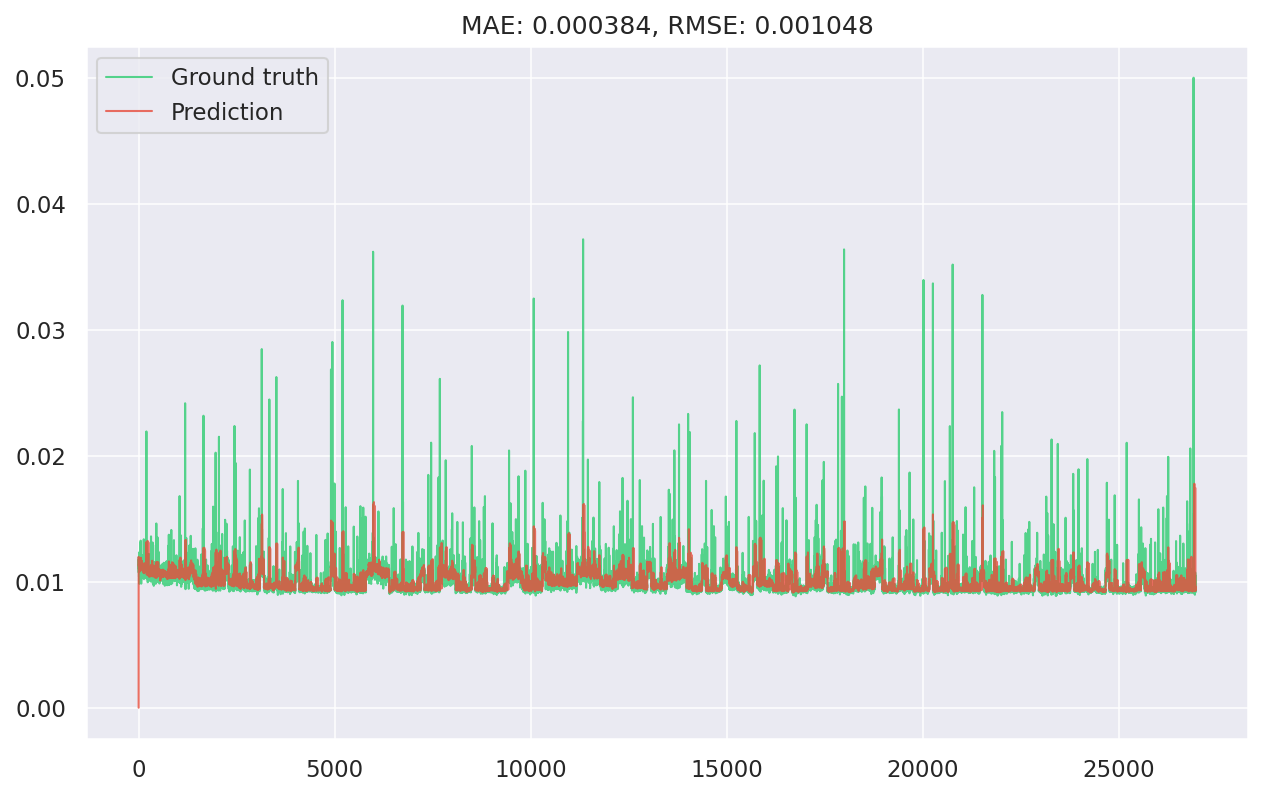

In [59]:
y_trues = []
y_preds = []
model = neighbors.KNNRegressor(window_size=50)
metric1 = metrics.MAE()
metric2 = metrics.RMSE()
for x, y in stream.iter_pandas(X, Y):
        # Obtain the prior prediction and update the model in one go
    y_pred = model.predict_one(x)
    model.learn_one(x,y)

        # Update the error metric
    metric1.update(y,y_pred)
    metric2.update(y,y_pred)

    y_trues.append(y)
    y_preds.append(y_pred)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(alpha=0.75)
ax.plot(Y.index, y_trues, lw=1, color='#2ecc71', alpha=0.8, label='Ground truth')
ax.plot(Y.index, y_preds, lw=1, color='#e74c3c', alpha=0.8, label='Prediction')
ax.legend()
ax.set_title(f'{metric1}, {metric2}')